160 575.1057208430448
160 0.01 160 1000 0.06674410489430796 0.803033952479466 264.89427915695524 415.7976269430742


Text(0, 0.5, 'λ')

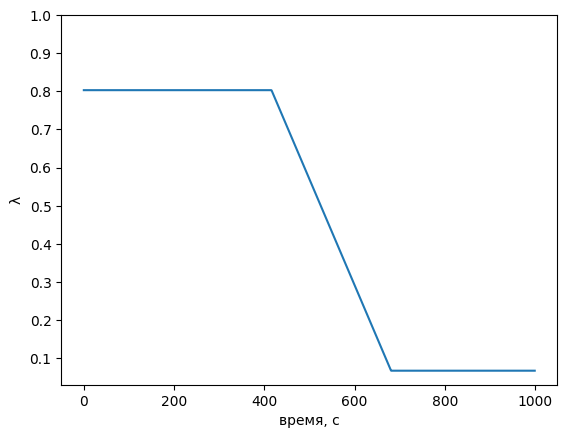

In [40]:
from app.dvmg.patterns import *
from app.dvmg.worker import *
from app.dvmg.processors import *

from matplotlib import pyplot as plt

# settings = Settings(
#                 to_generate=1000, min_x=160, min_y=0.01,
#                 min_anomaly_height=0.2, min_end_x=160,
#                 x_limit=1000, max_gap_y_bottom=0.2, is_random=True
#             )
# generatorWorker = GeneratorWorker(
#         settings, Sigmoid(), ExponentialProcessor())

# settings = Settings(
#                 to_generate=1000, min_x=160, min_y=0.01,
#                 min_anomaly_height=0.2, min_end_x=160,
#                 x_limit=1000, max_gap_y_bottom=0.2, is_random=True
#             )
# generatorWorker = GeneratorWorker(
#         settings, Normal(), ExponentialProcessor())

# settings = Settings(
#                 to_generate=1000, min_x=160, min_y=0.01,
#                 min_anomaly_height=0.2, min_end_x=160,
#                 x_limit=1000, is_random=True
#             )
# generatorWorker = GeneratorWorker(
#         settings, NormalFlipped(), ExponentialProcessor())

# settings = Settings(
#                 to_generate=1000, min_x=160, min_y=0.01,
#                 min_anomaly_height=0.2, min_end_x=160,
#                 x_limit=1000, max_gap_y_bottom=0.1, is_random=True
#             )
# generatorWorker = GeneratorWorker(
#         settings, LinearIncrease(), ExponentialProcessor())

settings = Settings(
                to_generate=1000, min_x=160, min_y=0.01,
                min_anomaly_height=0.2, min_end_x=160,
                x_limit=1000, max_gap_y_bottom=0.1, is_random=True
            )
generatorWorker = GeneratorWorker(
        settings, LinearDecrease(), ExponentialProcessor())


coordinates, processed_coordinates = generatorWorker.run()

plt.plot(coordinates.keys(), coordinates.values())
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel("время, с")
plt.ylabel("λ")



In [125]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.01, epochs=9):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        """
        Our fit function trains on the dataset X and tries to predict vector y,
        Using the learning rate, it will modify it's weight vector to increase
        it's accuracy in predictions.
        It will iterate over the X dataset as defined by the epochs.
        Args:
            X: The input data (numpy array of shape [n_samples * m_features])
            y: Class labels vector (numpy array of shape [n_samples])
        """
        # a vector of floats between 0 and 1
        weights = np.random.rand(X.shape[1],)
        print(X.shape[1])

        for epoch in range(self.epochs):
            # list of predicted classes for our accuracy calculation
            predicted = []
            for i_index, sample in enumerate(X):
                y_hat = self.predict(sample, weights)
                predicted.append(y_hat)  # add our new prediction to the array
                for j_index, feature in enumerate(weights):
                    # update our weight values
                    delta = self.lr * (y[i_index] - y_hat)
                    delta = delta * sample[j_index-1]
                    weights[j_index-1] = weights[j_index-1] + delta
            # print(weights)
            print('[Epoch {ep}] Accuracy: {acc}'.format(
                ep=epoch, acc=self._calculate_accuracy(y, predicted)
            ))
        self._weights = weights

    def _calculate_accuracy(self, actual, predicted):
        """
        Calculate the accuracy of predictions for this epoch.
        Args:
            actual: vector of actual class values (the y vector) [n_samples]
            predicted: vector of predicted class values [n_samples]
        """
        # print(actual, predicted)
        return sum(np.array(predicted) == np.array(actual)) / float(len(actual))

    def predict(self, x, w):
        """
        Create a binary prediction from an activation function on the data
        sample and the weight vector.
        Args:
            x: vector of the data sample - shape [m_features]
            w: vector of the weights - shape [m_features]
        Returns:
            0 or 1
        """
        res = self._sum(x, w)
        print(x, w, res)
        return 1 if res > 0.0 else 0.0

    def _sum(self, x, w):
        """
        Multiply our sample and weight vector elements then the sum of the
        result.
        Args:
            x: vector of the data sample - shape [m_features]
            w: vector of the weights - shape [m_features]
        Returns:
            Int of the sum of vector products
        """
        return np.sum(np.dot(x, np.transpose(w)))


p = Perceptron()
X = np.random.randint(20, size=(5, 6))
y = np.random.randint(2, size=(5,))
print(X,y)
p.fit(X, y)
print(p.predict(np.random.randint(20, size=(6)), p._weights))

[[14 10  6 16  1 16]
 [13 11  4  2  1 14]
 [ 4  5 12  2  4  4]
 [ 0  5  9  1  5 10]
 [17  6 10  5 11  7]] [0 0 0 0 1]
6
[14 10  6 16  1 16] [0.32864156 0.74960667 0.43268392 0.63141099 0.93478052 0.63367733] 35.86934575608077
[13 11  4  2  1 14] [0.18864156 0.64960667 0.37268392 0.47141099 0.92478052 0.47367733] 19.587834429585946
[ 4  5 12  2  4  4] [0.05864156 0.53960667 0.33268392 0.45141099 0.91478052 0.33367733] 12.821460037067546
[ 0  5  9  1  5 10] [0.01864156 0.48960667 0.21268392 0.43141099 0.87478052 0.29367733] 12.104275541307278
[17  6 10  5 11  7] [0.01864156 0.43960667 0.12268392 0.42141099 0.82478052 0.19367733] 16.716767719900105
[Epoch 0] Accuracy: 0.2
[14 10  6 16  1 16] [0.01864156 0.43960667 0.12268392 0.42141099 0.82478052 0.19367733] 16.059345756080766
[13 11  4  2  1 14] [-0.12135844  0.33960667  0.06268392  0.26141099  0.81478052  0.03367733] 4.217834429585946
[ 4  5 12  2  4  4] [-0.25135844  0.22960667  0.02268392  0.24141099  0.80478052 -0.10632267] 3.6914600